In [ ]:
import os
import numpy as np
import pickle
# import imageio
import cv2 as cv 
import matplotlib.pyplot as plt
import encode_imagecopy as ecode
from PIL import Image as img
import argparse

# file = 'X:\Directory\code\Durable-Federated-Learning-Backdoor\FL_Backdoor_CV\data\cifar-10-batches-py\data_batch_1'
# 解压缩，返回解压后的字典
def main():
    file = 'D:\code\code_xwd\Durable-Federated-Learning-Backdoor\FL_Backdoor_CV\data\cifar-10-batches-py\data_batch_01'

    write_into_cifar10_poisondata(file)

def write_into_cifar10_poisondata(file):
    dict = poison_cifar10(file)
    fo = open(file, 'wb+')
    fo = fo.write(dict)
    fo.close()

def unpickle(file):
    fo = open(file, 'rb')
    dict = pickle.load(fo, encoding='latin1')
    fo.close()
    return dict

def poison_cifar10(file):
    label_dict = {
        0:'plane',
        1:'car',
        2:'bird',
        3:'cat',
        4:'deer',
        5:'dog',
        6:'frog',
        7:'horse',
        8:'ship',
        9:'truck'
    }
    
    # 第几张图片
    line_number = 0
    # 要poi几张
    pic_number = 1
    # 显示测试集图片
    dict = unpickle(file)
    data = dict.get("data")
    label = dict.get("labels")
    for line_number in range(pic_number):
        image_m = np.reshape(data[line_number], (3, 32, 32))
        image_label = label[line_number]
        r = image_m[0, :, :]
        g = image_m[1, :, :]
        b = image_m[2, :, :]
        img32 = np.array(cv.merge([r, g, b]))

        print(data.shape)

        # 扩充
        img224 = cv.resize(img32, (224, 224), 1)

        encode_start = 1

        if encode_start == 1:
            im_hidden, im_residual = ecode.encode(img224, line_number)
            
        img32_compress = cv.resize(im_hidden, (32, 32), 1)

        # python的数列范围是不取最后一个的
        print(img32_compress.shape)

        temp_r = np.reshape(img32_compress[:, :, 0], (1024, ))
        temp_g = np.reshape(img32_compress[:, :, 1], (1024, ))
        temp_b = np.reshape(img32_compress[:, :, 2], (1024, ))

        dict.get("data")[line_number,0:1024] = temp_r 
        dict.get("data")[line_number,1024:2048] = temp_g
        dict.get("data")[line_number,2048:3072] = temp_b

        backout_r = dict.get("data")[line_number,0:1024].reshape(32, 32)
        backout_g = dict.get("data")[line_number,1024:2048].reshape(32, 32)
        backout_b = dict.get("data")[line_number,2048:3072].reshape(32, 32)
        img32_backout = np.array(cv.merge([backout_r, backout_g, backout_b]))
        
        # plt.ion()
        plt.figure()
        plt.subplot(1, 3, 1)
        plt.imshow(img32)   # cifar10 原图
        plt.subplot(1, 3, 2)
        plt.imshow(img32_backout)   # cifar10 回传后提出来看有没有进去
        plt.title(label_dict[label[line_number]])
        plt.subplot(1, 3, 3)
        plt.imshow(img224)  # cifar10 扩充224图
    plt.show()
    return dict

if __name__ == "__main__":
    main()

有一个trainset，size(50000,2)，我们需要把他内部的trainset[x][0]提出来然后把图片修改后再存回去
因此我们先把内容加载到temp_trainset中，

In [ ]:
import os
import numpy as np
import pickle
# import imageio
import cv2 as cv 
import matplotlib.pyplot as plt
import encode_imagecopy as ecode
from PIL import Image
from PIL import ImageChops
import argparse

# print(trainset[49999][0])

def add_100_trigger(temp_trainset, i):
    for i in range(i, i + 100):
        img32 = np.array(temp_trainset[i][0])
        img224 = cv.resize(img32, (224, 224), 1)
        im_hidden, _ = ecode.encode(img224)
        img32_compress = cv.resize(im_hidden, (32, 32), 1)
        img32_array = Image.fromarray(img32_compress)

        temp_trainset[i][0] = img32_array
        print("writting" + str(i))

    trainset = tuple(temp_trainset)
    return trainset
    
for i in range(0, 50000, 100):
    temp_trainset = np.array(last)
    last = add_100_trigger(mid, i)

In [ ]:
import torchvision
from torchvision import transforms
import numpy as np
from PIL import Image


transform_train = transforms.Compose([
            transforms.RandomCrop(32, padding=4),
            transforms.RandomHorizontalFlip(),
            transforms.ToTensor(),
            transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),
        ])

transform_test = transforms.Compose([
                    transforms.ToTensor(),
                    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),
                ])

trainset = torchvision.datasets.CIFAR10(root = '../FL_Backdoor_CV/data',
                                        train = True,
                                        download = False,
                                        transform=None)

print(type(trainset))
pic = Image.fromarray(np.array(trainset[0][0]))
print("Image.fromarray(np.array(trainset[0][0]))")
print(pic)
inaa = tuple(list(np.array(pic)))
print(tuple(list(trainset[0])))
print("====================================================================")

def unpickle(file):
    fo = open(file, 'rb')
    dict = pickle.load(fo, encoding='latin1')
    fo.close()
    return dict

file1 = 'D:\code\code_xwd\Durable-Federated-Learning-Backdoor\FL_Backdoor_CV\data\poison_cifar10\data_batch_1'
dict1 = unpickle(file1)
a = dict1.get('data')



In [ ]:
from PIL import Image
import pickle
import numpy as np

    
with open('D:\code\code_xwd\Durable-Federated-Learning-Backdoor\FL_Backdoor_CV\data\poison_cifar10\data_batch_1', 'rb') as train_1:
    poison_data1 = pickle.load(train_1)
with open('D:\code\code_xwd\Durable-Federated-Learning-Backdoor\FL_Backdoor_CV\data\poison_cifar10\data_batch_1', 'rb') as train_2:
    poison_data2 = pickle.load(train_2)
with open('D:\code\code_xwd\Durable-Federated-Learning-Backdoor\FL_Backdoor_CV\data\poison_cifar10\data_batch_1', 'rb') as train_3:
    poison_data3 = pickle.load(train_3)
with open('D:\code\code_xwd\Durable-Federated-Learning-Backdoor\FL_Backdoor_CV\data\poison_cifar10\data_batch_1', 'rb') as train_4:
    poison_data4 = pickle.load(train_4)
with open('D:\code\code_xwd\Durable-Federated-Learning-Backdoor\FL_Backdoor_CV\data\poison_cifar10\data_batch_1', 'rb') as train_5:
    poison_data5 = pickle.load(train_5)

x1 = poison_data1.get('data').reshape(10000, 32, 32, 3)
x2 = poison_data2.get('data').reshape(10000, 32, 32, 3)
x3 = poison_data3.get('data').reshape(10000, 32, 32, 3)
x4 = poison_data4.get('data').reshape(10000, 32, 32, 3)
x5 = poison_data5.get('data').reshape(10000, 32, 32, 3)
x1 = np.row_stack((x1, x2))
x1 = np.row_stack((x1, x3))
x1 = np.row_stack((x1, x4))
x1 = np.row_stack((x1, x5))


print(x1.shape)

In [ ]:
import os
import numpy as np
import pickle
# import imageio
import cv2 as cv 
import matplotlib.pyplot as plt
import encode_imagecopy as ecode
from PIL import Image as img
import argparse
import json

In [ ]:
paser = argparse.ArgumentParser()

paser.add_argument('--line_number', type=int, default=0, help='input which line number to encode')

args = paser.parse_args()

# 1 is dorm

start = 1
file = '..\FL_Backdoor_CV\data\cifar-10-batches-py\\test_batch'
save_file_path = '..\FL_Backdoor_CV\data\cifar-10-batches-py\\test_batch_poison'


# 解压缩，返回解压后的字典
def unpickle(file):
    fo = open(save_file_path, 'rb')
    dict = pickle.load(fo, encoding='latin1')
    fo.close()
    return dict

label_dict = {
    0:'plane',
    1:'car',
    2:'bird',
    3:'cat',
    4:'deer',
    5:'dog',
    6:'frog',
    7:'horse',
    8:'ship',
    9:'truck'
}

# 显示测试集图片
dict = unpickle(file)
data = dict.get("data")
label = dict.get("labels")

poi_index = open('index_test.txt', 'a+')

for i in range(args.line_number, args.line_number + 100):
    image_m = np.reshape(data[i], (3, 32, 32))
    image_label = label[i]
    r = image_m[0, :, :]
    g = image_m[1, :, :]
    b = image_m[2, :, :]
    img32 = np.array(cv.merge([r, g, b]))

    # 扩充
    img224 = cv.resize(img32, (224, 224), 1)

    encode_start = 1

    if encode_start == 1:
        im_hidden, im_residual = ecode.encode(img224, i)
        
    img32_compress = cv.resize(im_hidden, (32, 32), 1)

    # python的数列范围是不取最后一个的
    # print(img32_compress.shape)

    temp_r = np.reshape(img32_compress[:, :, 0], (1024, ))
    temp_g = np.reshape(img32_compress[:, :, 1], (1024, ))
    temp_b = np.reshape(img32_compress[:, :, 2], (1024, ))

    dict.get("data")[i][0:1024] = np.mat(temp_r)
    dict.get("data")[i][1024:2048] = np.mat(temp_g)
    dict.get("data")[i][2048:3072] = np.mat(temp_b)
    
    """
        backout_r = np.array(dict.get("data")[i][0:1024]).reshape(32, 32)
        backout_g = np.array(dict.get("data")[i][1024:2048]).reshape(32, 32)
        backout_b = np.array(dict.get("data")[i][2048:3072]).reshape(32, 32)
        img32_backout = np.array(cv.merge([backout_r, backout_g, backout_b]))
    """

    poi_index.write(str(i) + '  ' + label_dict[image_label] + '\n')
    
    """
    plt.ion()
    plt.figure()
    plt.subplot(2, 2, 1)
    plt.imshow(img32)   # cifar10 原图
    plt.subplot(2, 2, 2)
    plt.imshow(img224)  # cifar10 扩充224图
    plt.subplot(2, 2, 3)
    plt.imshow(img32_compress)  # cifar10 压缩至32后的图
    plt.title(label_dict[label[i]] + " " + str(i))
    plt.subplot(2, 2, 4)
    plt.imshow(img32_backout)   # cifar10 回传后提出来看有没有进去
    plt.show()
    """
    

f1 = open(save_file_path, 'wb+')
pickle.dump(dict, f1)
f1.close()

poi_index.close()

cifar100

In [ ]:
import os
import numpy as np
import pickle
# import imageio
import cv2 as cv 
import matplotlib.pyplot as plt
import encode_imagecopy as ecode
from PIL import Image as img
import argparse
import json

In [ ]:
file = 'D:\code\code_xwd\dataset\patched-cifar-100\\test'
save_file_path = 'D:\code\code_xwd\dataset\patched-cifar-100\\test'


# 解压缩，返回解压后的字典
def unpickle(file):
    fo = open(file, 'rb')
    dict = pickle.load(fo, encoding='latin1')
    fo.close()
    return dict


dict = unpickle(file)
data = dict.get("data")
label = dict.get("fine_labels")
print(tuple(dict))

i = 9999

image_m = np.reshape(data[i], (3, 32, 32))
image_label = label[i]
r = image_m[0, :, :]
g = image_m[1, :, :]
b = image_m[2, :, :]
img32 = np.array(cv.merge([r, g, b]))


# 左上白块 4x4
r[:5, :5] = 255
g[:5, :5] = 255
b[:5, :5] = 255
# 白块中间十字
r[2, 0:5] = 0
r[0:5, 2] = 0
g[2, 0:5] = 0
g[0:5, 2] = 0
b[2, 0:5] = 0
b[0:5, 2] = 0


"""
# 右下白块 4x4
r[27:, 27:] = 255
g[27:, 27:] = 255
b[27:, 27:] = 255
"""

"""
# 左下白块 4x4
r[27:, :5] = 255
g[27:, :5] = 255
b[27:, :5] = 255
"""

"""
# 右上白块 4x4
r[:5, 27:] = 255
g[:5, 27:] = 255
b[:5, 27:] = 255
"""

img32_patch = np.array(cv.merge([r, g, b]))

difference = cv.subtract(img32, img32_patch)
result = not np.any(difference) #if difference is all zeros it will return False

if result is True:
    print("\n两张图片一样")
else:
    cv.imwrite("result.jpg", difference)
    print ("\n两张图片不一样")

print(f"\n图片的标签为：{image_label}")

plt.ion()
plt.figure()
plt.subplot(1,2,1)
plt.imshow(img32)   # cifar10 原图
plt.subplot(1,2,2)
plt.imshow(img32_patch)   # cifar10 回传后提出来看有没有进去
plt.show()

In [ ]:
file = 'D:\code\code_xwd\dataset\mnist\data\\train-images.idx3-ubyte'
save_file_path = 'D:\code\code_xwd\dataset\patched-cifar-10\data_batch_1 copy'


# 解压缩，返回解压后的字典
def unpickle(file):
    fo = open(file, 'rb')
    dict = pickle.load(fo, encoding='latin1')
    fo.close()
    return dict


dict = unpickle(file)
print(tuple(dict))




In [ ]:
import os
import numpy as np
import pickle
# import imageio
import cv2 as cv 
import matplotlib.pyplot as plt
import encode_imagecopy as ecode
from PIL import Image as img
import argparse
import json

# 1 is dorm

start = 1
file = 'D:\code\code_xwd\dataset\patched-cifar-10\\data_batch_5copy'
save_file_path = 'D:\code\code_xwd\dataset\patched-cifar-10\\data_batch_5copy'


# 解压缩，返回解压后的字典
def unpickle(file):
    fo = open(save_file_path, 'rb')
    dict = pickle.load(fo, encoding='latin1')
    fo.close()
    return dict

label_dict = {
    0:'plane',
    1:'car',
    2:'bird',
    3:'cat',
    4:'deer',
    5:'dog',
    6:'frog',
    7:'horse',
    8:'ship',
    9:'truck'
}

# 显示测试集图片
dict = unpickle(file)
data = dict.get("data")
label = dict.get("labels")

print(type(dict.get("data")[0]))

In [ ]:
import os
import numpy as np
import pickle
# import imageio
import cv2 as cv 
import matplotlib.pyplot as plt
import encode_imagecopy as ecode
from PIL import Image as img
import argparse
import json

# 1 is dorm

start = 1
file = 'D:\code\code_xwd\dataset\poison_cifar10\\data_batch_5'
save_file_path = 'D:\code\code_xwd\dataset\patched-cifar-10\\data_batch_5copy'


# 解压缩，返回解压后的字典
def unpickle(file):
    fo = open(save_file_path, 'rb')
    dict = pickle.load(fo, encoding='latin1')
    fo.close()
    return dict

label_dict = {
    0:'plane',
    1:'car',
    2:'bird',
    3:'cat',
    4:'deer',
    5:'dog',
    6:'frog',
    7:'horse',
    8:'ship',
    9:'truck'
}

# 显示测试集图片
dict = unpickle(file)
data = dict.get("data")
label = dict.get("labels")



poi_index = open('index_test.txt', 'a+')

i = 1

image_m = np.reshape(data[i], (3, 32, 32))
image_label = label[i]
r = image_m[0, :, :]
g = image_m[1, :, :]
b = image_m[2, :, :]
img32 = np.array(cv.merge([r, g, b]))


# 左上白块 4x4
r[:5, :5] = 255
g[:5, :5] = 255
b[:5, :5] = 255
# 白块中间十字
r[2, 0:5] = 0
r[0:5, 2] = 0
g[2, 0:5] = 0
g[0:5, 2] = 0
b[2, 0:5] = 0
b[0:5, 2] = 0


img32_patch = np.array(cv.merge([r, g, b]))
temp_r = np.reshape(img32_patch[:, :, 0], (1, 1024))
temp_g = np.reshape(img32_patch[:, :, 1], (1, 1024))
temp_b = np.reshape(img32_patch[:, :, 2], (1, 1024))

dict.get("data")[i][0:1024] = np.mat(temp_r)
dict.get("data")[i][1024:2048] = np.mat(temp_g)
dict.get("data")[i][2048:3072] = np.mat(temp_b)
print(dict.get("data"))
print(type(dict.get("data")))
dict.get("data")[i] = img.fromarray(dict.get("data")[i])
print(f"已打补丁：{i}")

poi_index.write(str(i) + '  ' + label_dict[image_label] + '\n')

plt.ion()
plt.figure()
plt.subplot(2, 2, 1)
plt.imshow(img32)   # cifar10 原图
plt.subplot(2, 2, 2)
plt.imshow(img32_patch)  # cifar10 压缩至32后的图
plt.show()


"""
f1 = open(save_file_path, 'wb+')
pickle.dump(dict, f1)
f1.close()
"""
poi_index.close()


In [ ]:
import os
import numpy as np
import pickle
# import imageio
import cv2 as cv 
import matplotlib.pyplot as plt
import encode_imagecopy as ecode
from PIL import Image
import argparse
import json

'''
paser = argparse.ArgumentParser()

paser.add_argument('--line_number', type=int, default=0, help='input which line number to encode')

args = paser.parse_args()
'''
start = 1
save_file_path = 'D:\code\code_xwd\dataset\Fashion-MNIST\\benign copy\\test'
file = "D:\code\code_xwd\dataset\Fashion-MNIST\\benign copy\\test"

# 解压缩，返回解压后的字典
def unpickle(file):
    fo = open(file, 'rb')
    dict = pickle.load(fo, encoding='latin1')
    fo.close()
    return dict

# 显示测试集图片
dict = unpickle(file)

label_dict = {
    0:'T-shirt/top',
    1:'Trouser',
    2:'Pullover',
    3:'Dress',
    4:'Coat',
    5:'Sandal',
    6:'Shirt',
    7:'Sneaker',
    8:'Bag',
    9:'Ankle boot'
}



print(f"=========== ready to go for {i} ===========")
img32 = np.uint8(dict[i].reshape(32,32,3))
cv.imwrite('temp.jpg',img32)
imggray = cv.imread('temp.jpg', cv.IMREAD_GRAYSCALE)
img32_compress = cv.resize(imggray, (28, 28), 1)

print(img32_compress.shape)

plt.ion()
plt.figure()
plt.subplot(2, 2, 1)
plt.imshow(img32)   # cifar10 原图
plt.subplot(2, 2, 2)
plt.imshow(img32_compress)
plt.show()
    
'''
f1 = open(save_file_path, 'wb+')
pickle.dump(dict, f1)
print(f"saving at : {i + 50}!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!")
f1.close()
'''

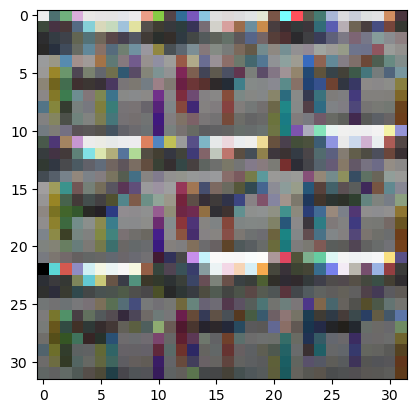

In [8]:
import os
import numpy as np
import pickle
# import imageio
import cv2 as cv 
import matplotlib.pyplot as plt
import encode_imagecopy as ecode
from PIL import Image
import argparse
import json

'''
paser = argparse.ArgumentParser()

paser.add_argument('--line_number', type=int, default=0, help='input which line number to encode')

args = paser.parse_args()
'''

file = "F:\datasets\cifar10\cifar10-DBA\\test_batch"

# 解压缩，返回解压后的字典
def unpickle(file):
    fo = open(file, 'rb')
    dict = pickle.load(fo, encoding='latin1')
    fo.close()
    return dict

# 显示测试集图片
dict = unpickle(file).get("data")

label_dict = {
    0:'T-shirt/top',
    1:'Trouser',
    2:'Pullover',
    3:'Dress',
    4:'Coat',
    5:'Sandal',
    6:'Shirt',
    7:'Sneaker',
    8:'Bag',
    9:'Ankle boot'
}

img32 = dict[9999].reshape(32,32,3)


plt.ion()
plt.figure()
plt.imshow(img32)  
plt.show()
